In [ ]:
!apt-get install swig
#!pip install pyrfr
!pip install smac[all]

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy as sy
from scipy.io import wavfile as wav #importare ed esportare file audio
import pylab
import numpy as np
import os
import sys

In [0]:
import smac
import numpy as np
import pandas as pd
import seaborn as sns
import pyDOE
from ConfigSpace.hyperparameters import UniformFloatHyperparameter, UniformIntegerHyperparameter,CategoricalHyperparameter
from smac.tae.execute_func import ExecuteTAFuncDict
from smac.optimizer.acquisition import EI, LCB
from smac.configspace import ConfigurationSpace, Configuration
from smac.initial_design.latin_hypercube_design import LHDesign
from smac.facade.smac_hpo_facade import SMAC4HPO
from smac.facade.smac_bo_facade import SMAC4BO
from smac.facade.smac_ac_facade import SMAC4AC
from smac.scenario.scenario import Scenario
from google.colab import drive
drive.mount('/content/drive')

In [0]:
giox_path = "/content/drive/My Drive/Dataset/Test_Audio/Giorgio_set/"
lox_path = "/content/drive/My Drive/Dataset/Test_Audio/Lorenzo_set/"
altri_path = "/content/drive/My Drive/Dataset/Test_Audio/AltreVoci_set/"
#Descrizione + chi ha parlato Lorenzo
lox_descr = np.load(lox_path+"lor_audio_descrizione.npy")
lox_y_descr_de = np.repeat("descrizione", len(lox_descr))
lox_y_descr_chi = np.repeat("lorenzo", len(lox_descr))  

lox_descr2 = np.load(lox_path+"lor_audio_descrizione2.npy").reshape(10,110250)
lox_y_descr_de2 = np.repeat("descrizione", len(lox_descr2))
lox_y_descr_chi2 = np.repeat("lorenzo", len(lox_descr2))
#Sanzione + chi ha parlato Lorenzo
lox_sanz = np.load(lox_path+"lor_audio_sanzione.npy")
lox_y_sanz_sa = np.repeat("sanzione", len(lox_sanz))
lox_y_sanz_chi = np.repeat("lorenzo", len(lox_sanz))

lox_sanz2 = np.load(lox_path+"lor_audio_sanzione2.npy").reshape(10,110250)
lox_y_sanz_sa2 = np.repeat("sanzione", len(lox_sanz2))
lox_y_sanz_chi2 = np.repeat("lorenzo", len(lox_sanz2))
# Tipologia + chi ha parlato Lorenzo
lox_tipo = np.load(lox_path+"lor_audio_tipologia.npy")
lox_y_tipo_ti = np.repeat("tipologia", len(lox_tipo))
lox_y_tipo_chi = np.repeat("lorenzo", len(lox_tipo))

lox_tipo2 = np.load(lox_path+"lor_audio_tipologia2.npy").reshape(10,110250)
lox_y_tipo_ti2 = np.repeat("tipologia", len(lox_tipo2))
lox_y_tipo_chi2 = np.repeat("lorenzo", len(lox_tipo2))
#Descrizione + chi ha parlato Giorgio
gio_descr = np.load(giox_path+"giox_audio_descrizione.npy")
gio_y_descr_de = np.repeat("descrizione", len(gio_descr))
gio_y_descr_chi = np.repeat("giorgio", len(gio_descr))

gio_descr2 = np.load(giox_path+"giox_audio_descrizione2.npy").reshape(10,110250)
gio_y_descr_de2 = np.repeat("descrizione", len(gio_descr2))
gio_y_descr_chi2 = np.repeat("giorgio", len(gio_descr2))
#Sanzione + chi ha parlato Giorgio
gio_sanz = np.load(giox_path+"giox_audio_sanzione.npy")
gio_y_sanz_sa = np.repeat("sanzione", len(gio_sanz))
gio_y_sanz_chi = np.repeat("giorgio", len(gio_sanz))

gio_sanz2 = np.load(giox_path+"giox_audio_sanzione2.npy").reshape(10,110250)
gio_y_sanz_sa2 = np.repeat("sanzione", len(gio_sanz2))
gio_y_sanz_chi2 = np.repeat("giorgio", len(gio_sanz2))
# Tipologia + chi ha parlato Giorgio
gio_tipo = np.load(giox_path+"giox_audio_tipologia.npy")
gio_y_tipo_ti = np.repeat("tipologia", len(gio_tipo))
gio_y_tipo_chi = np.repeat("giorgio", len(gio_tipo))

gio_tipo2 = np.load(giox_path+"giox_audio_tipologia2.npy").reshape(10,110250)
gio_y_tipo_ti2 = np.repeat("tipologia", len(gio_tipo2))
gio_y_tipo_chi2 = np.repeat("giorgio", len(gio_tipo2))

# Sconosciuti
altri_descr = np.load(altri_path+"persone_descrizione.npy").T
altri_descr_de = np.repeat("descrizione", len(altri_descr))
altri_descr_chi = np.repeat("sconosciuto", len(altri_descr))

altri_sanz = np.load(altri_path+"persone_sanzione.npy").T
altri_sanz_sa = np.repeat("sanzione", len(altri_sanz))
altri_sanz_chi = np.repeat("sconosciuto", len(altri_sanz))

altri_tipo = np.load(altri_path+"persone_tipologia.npy").T
altri_tipo_ti = np.repeat("tipologia", len(altri_tipo))
altri_tipo_chi = np.repeat("sconosciuto", len(altri_tipo))

In [0]:
X = np.concatenate([lox_descr,lox_descr2, gio_descr,gio_descr2, lox_sanz,lox_sanz2,
                    gio_sanz,gio_sanz2, lox_tipo,lox_tipo2, gio_tipo,gio_tipo2, altri_descr,altri_sanz,altri_tipo], axis = 0)
y_cosa = np.concatenate([lox_y_descr_de,lox_y_descr_de2, gio_y_descr_de, gio_y_descr_de2, lox_y_sanz_sa,lox_y_sanz_sa2,
                         gio_y_sanz_sa,gio_y_sanz_sa2,lox_y_tipo_ti,lox_y_tipo_ti2, gio_y_tipo_ti,gio_y_tipo_ti2, 
                        altri_descr_de,altri_sanz_sa, altri_tipo_ti], axis = 0)
y_chi = np.concatenate([lox_y_descr_chi,lox_y_descr_chi2, gio_y_descr_chi, gio_y_descr_chi2,lox_y_sanz_chi, lox_y_sanz_chi2,
                        gio_y_sanz_chi,gio_y_sanz_chi2, lox_y_tipo_chi, lox_y_tipo_chi2,gio_y_tipo_chi,gio_y_tipo_chi2,
                       altri_descr_chi, altri_sanz_chi,altri_tipo_chi], axis = 0)

In [0]:
df = pd.DataFrame(y_chi, y_cosa).reset_index()

In [0]:
donna_desc = df[(df[0] == "sconosciuto") & (df["index"] == "descrizione")].iloc[0:39].index
uomo_desc = df[(df[0] == "sconosciuto") & (df["index"] == "descrizione")].iloc[39:].index

In [0]:
donna_tipo = df[(df[0] == "sconosciuto") & (df["index"] == "tipologia")].iloc[0:39].index
uomo_tipo = df[(df[0] == "sconosciuto") & (df["index"] == "tipologia")].iloc[39:].index

In [0]:
donna_sanz = df[(df[0] == "sconosciuto") & (df["index"] == "sanzione")].iloc[28:36].index
uomo_sanz = df[(df[0] == "sconosciuto") & (df["index"] == "sanzione")].iloc[:28].index

In [0]:
df["Sesso"] = "Vuoto"

In [0]:
df["Sesso"].iloc[uomo_desc] = "Uomo"
df["Sesso"].iloc[uomo_tipo] = "Uomo"
df["Sesso"].iloc[uomo_sanz] = "Uomo"

In [0]:
df["Sesso"].iloc[donna_desc] = "Donna"
df["Sesso"].iloc[donna_tipo] = "Donna"
df["Sesso"].iloc[donna_sanz] = "Donna"

In [0]:
df["Sesso"].iloc[df[df["Sesso"] == "Vuoto"].index] = "Uomo"

# Data augmentation

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


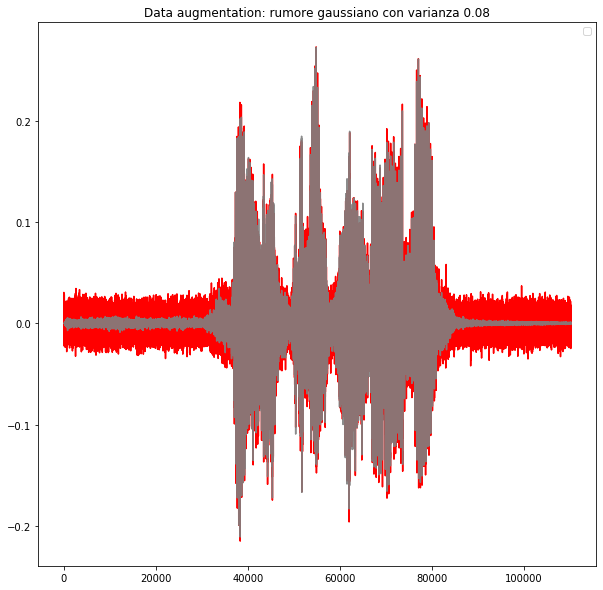

In [20]:
y_noise_aug = []
x_copy = X
for i in x_copy:
  y_noise = i
  noise_amp = 0.08*np.random.uniform()*np.amax(y_noise)
  y_noise = y_noise.astype('float64') + noise_amp * np.random.normal(size=y_noise.shape[0])
  y_noise_aug.append(y_noise)


from IPython.display import Audio
Audio(y_noise_aug[26], rate=44100)
Audio(X[26], rate=44100)

plt.figure(1)
plt.figure(figsize=(10,10))
#plt.title("Signal Wave...")
plt.plot(y_noise_aug[1], color = "red")
plt.plot(X[1],  color = "gray", alpha = 0.9)
plt.title("Data augmentation: rumore gaussiano con varianza 0.08")
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

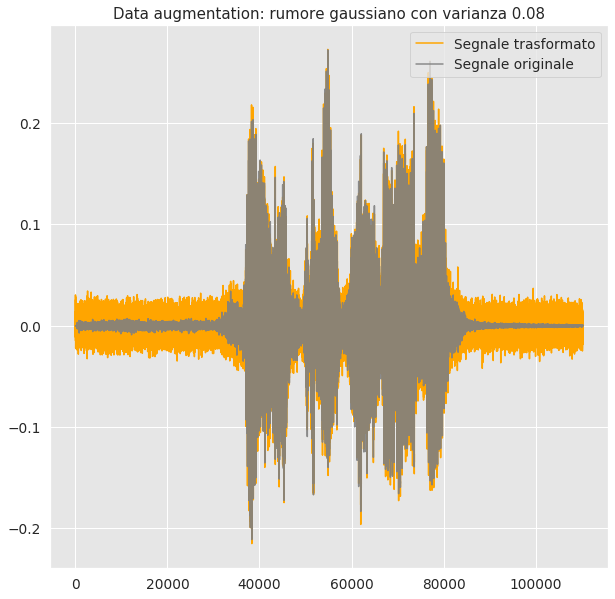

In [26]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale=1.25)
plt.figure(1)
plt.figure(figsize=(10,10))
plt.plot(y_noise_aug[1], color = "orange")
plt.plot(X[1],  color = "gray", alpha = 0.9)
plt.title("Data augmentation: rumore gaussiano con varianza 0.08")
plt.legend(loc="upper right", labels = ["Segnale trasformato", "Segnale originale"])
plt.savefig('/content/drive/My Drive/Dataset/dataaug_gauss.png')
plt.show()

In [0]:
y_shift_aug_dx = []
for i in x_copy:
    y_shift = i
    timeshift_fac = 0.3*(np.random.uniform()-0.2)  # up to 20% of length
    start = int(y_shift.shape[0] * timeshift_fac)
    if (start > 0):
        y_shift = np.pad(y_shift,(start,0),mode='constant')[0:y_shift.shape[0]]
        y_shift_aug_dx.append(y_shift)
    else:
        y_shift = np.pad(y_shift,(-start,0),mode='constant')[0:y_shift.shape[0]]
        y_shift_aug_dx.append(y_shift)

Audio(y_shift_aug_dx[1], rate=44100)
Audio(X[1], rate=44100)


new_x = np.concatenate([X, np.array(y_noise_aug), np.array(y_shift_aug_dx)], axis = 0)
new_y_chi = np.concatenate([y_chi, y_chi, y_chi], axis = 0)
new_y_cosa = np.concatenate([y_cosa, y_cosa, y_cosa], axis = 0)
df1 = pd.DataFrame(new_y_cosa)
import seaborn as sns
#sns.countplot(x=0, data=df1)


<Figure size 432x288 with 0 Axes>

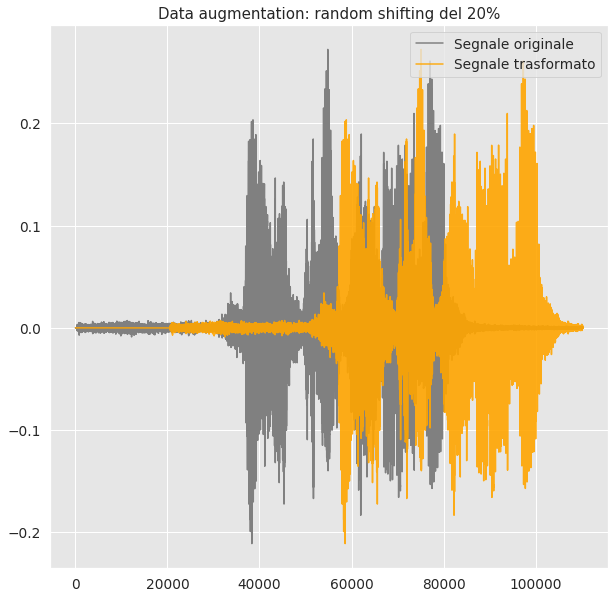

In [28]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale=1.25)
plt.figure(1)
plt.figure(figsize=(10,10))
plt.plot(X[1], color = "gray")
plt.plot(y_shift_aug_dx[1], color = "orange", alpha = 0.9)
plt.title("Data augmentation: random shifting del 20%")
plt.legend(loc="upper right", labels = ["Segnale originale", "Segnale trasformato"])
plt.savefig('/content/drive/My Drive/Dataset/dataaug_shift.png')
plt.show()

In [0]:
sex = np.concatenate([df.Sesso, df.Sesso, df.Sesso], axis = 0)

# Features extraction da ciascun suono 

In [0]:
import librosa

def feat_prova(X):
    sample_rate = 44100
    # short term fourier transform: represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows.
    stft = np.abs(librosa.stft(X))
    
    # mfcc (mel-frequency cepstrum) The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope.
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)

    # chroma 
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

    # melspectrogram It partitions the Hz scale into bins, and transforms each bin into a corresponding bin in the Mel Scale, using a overlapping triangular filters.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

    # spectral contrast Each frame of a spectrogram S is divided into sub-bands. For each sub-band, the energy contrast is estimated by comparing the mean energy in the top quantile (peak energy) to that of the bottom quantile (valley energy). High contrast values generally correspond to clear, narrow-band signals, while low contrast values correspond to broad-band noise.
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)

    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    
    return mfccs,chroma,mel,contrast,tonnetz

# Senza multiprocessing

In [0]:
mfccs_lista = []
chroma_lista = []
mel_lista = []
contrast_lis = []
ton_lis = []

for i in new_x:
    mfccs,chroma,mel,contrast,tonnetz = feat_prova(i)
    mfccs_lista.append(mfccs)
    chroma_lista.append(chroma)
    mel_lista.append(mel)
    contrast_lis.append(contrast)
    ton_lis.append(tonnetz)

mfccs_list = np.array(mfccs_lista)
chroma_lista = np.array(chroma_lista)
mel_lista = np.array(mel_lista)
contrast_lis= np.array(contrast_lis)
ton_lis = np.array(ton_lis)


/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


## Multiprocessing

In [ ]:
import time
import warnings
warnings.filterwarnings('ignore')

import multiprocessing as mp

start_time = time.time()

if __name__ == '__main__':
    p = mp.Pool(processes = mp.cpu_count())
    result = p.map(feat_prova, new_x)
    p.close()
    p.join()

end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))

mfccs_lista = np.expand_dims(result[0][0], axis = 0)
chroma_lista = np.expand_dims(result[0][1], axis = 0)
mel_lista = np.expand_dims(result[0][2], axis = 0)
contrast_lis = np.expand_dims(result[0][3], axis = 0)
ton_lis = np.expand_dims(result[0][4], axis = 0)
for i in range(0,len(result)):
    mfccs_lista = np.concatenate([mfccs_lista,np.expand_dims(result[i][0], axis = 0)], axis = 0)
    chroma_lista = np.concatenate([chroma_lista,np.expand_dims(result[i][1], axis = 0)], axis = 0)
    mel_lista = np.concatenate([mel_lista,np.expand_dims(result[i][2], axis = 0)], axis = 0)
    contrast_lis = np.concatenate([contrast_lis,np.expand_dims(result[i][3], axis = 0)], axis = 0)
    ton_lis = np.concatenate([ton_lis,np.expand_dims(result[i][4], axis = 0)], axis = 0)

In [0]:
features2 = np.concatenate([mfccs_lista,chroma_lista,mel_lista, contrast_lis], axis = 1)

In [0]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

encoder = LabelEncoder()
y_cosa_dummy = encoder.fit_transform(new_y_cosa)

encoder2 = LabelEncoder()
y_chi_dummy = encoder2.fit_transform(new_y_chi)

In [0]:
feat = pd.DataFrame(features2)
feat["Chi"] = y_chi_dummy
feat["Cosa"] = y_cosa_dummy
feat["sex"] = sex

In [0]:
#shuffle dei dati:
feat = feat.sample(frac=1, random_state = 1).reset_index(drop=True)

# Modello con classe persona che parla 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat.iloc[:,0:187].values, feat.Chi.values,
                                                    stratify=feat["Chi"],test_size=0.3, random_state = 5)
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
sst = StandardScaler()
X_train = sst.fit_transform(X_train)
X_test = sst.transform(X_test)
from sklearn.externals.joblib import dump, load
dump(sst, '/content/drive/My Drive/Dataset/std_scaler_modello_chi.bin', compress=True)
import sklearn
np.__version__

'1.17.5'

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from scipy.stats import uniform
from sklearn.model_selection import StratifiedKFold
import random
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [0]:
#clf = SVC(kernel = "rbf", gamma = 'auto')#OneVsRestClassifier(SVC(C=13, kernel='rbf', gamma = 'auto'))
#clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.001)
#clf = RandomForestClassifier(n_estimators=100)
clf = MLPClassifier(activation="tanh", solver = "lbfgs")
#clf = LogisticRegression()
scores = cross_val_score(clf, X_train, y_train, cv=9)
clf.fit(X_train, y_train)
test_pred = clf.predict(X_test)
score2 = accuracy_score(y_test,test_pred)
print(" accuracy test: ", score2)
print('Accuracy CV & variance: ', scores.mean(), scores.std() * 2)

from sklearn.metrics import classification_report
print(classification_report(test_pred, y_test))

 accuracy test:  0.9911764705882353
Accuracy CV & variance:  0.9797544409613373 0.04647892657530666
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        96
           1       0.98      1.00      0.99        93
           2       0.99      0.99      0.99       151

    accuracy                           0.99       340
   macro avg       0.99      0.99      0.99       340
weighted avg       0.99      0.99      0.99       340



# Random Search:

- Ottimizzazione parametri learning rate, momentum e numero di neuroni

In [0]:
import time
start_time = time.time()
clf_chi = MLPClassifier()
parametri = {"learning_rate_init": uniform(0.0001, 0.1), "momentum": uniform(0.1, 0.9),
             "hidden_layer_sizes":[random.randint(150,280)],"random_state":[random.randint(0,200)]}
skfold = StratifiedKFold(n_splits = 9)
clf_randomsearch = RandomizedSearchCV(clf_chi, parametri,n_iter = 50, cv = skfold, scoring = "accuracy")
clf_randomsearch.fit(X_train, y_train)
end_time = time.time( )
print("Elapsed time was %g seconds" % (end_time - start_time))
print("Miglior configurazione: {}\nMiglior accuratezza: {}".format(clf_randomsearch.best_params_, clf_randomsearch.best_score_))

Elapsed time was 503.445 seconds
Miglior configurazione: {'hidden_layer_sizes': 237, 'learning_rate_init': 0.004844383103044748, 'momentum': 0.23434964846117043, 'random_state': 138}
Miglior accuratezza: 0.9861111111111112


In [0]:
param = clf_randomsearch.best_params_
param['hidden_layer_sizes']
param['learning_rate_init']
param['momentum']

0.44578241572720767

In [0]:
clf_chi = MLPClassifier(random_state=138, hidden_layer_sizes=(param['hidden_layer_sizes']), learning_rate_init=param['learning_rate_init'],
                       momentum = param['momentum'])                  
scores = cross_val_score(clf_chi, X_train, y_train, cv=skfold)
clf_chi.fit(X_train, y_train)
test_pred = clf_chi.predict(X_test)
score2 = accuracy_score(y_test,test_pred)
print(" accuracy test: ", score2)
print('Accuracy CV & variance: ', scores.mean(), scores.std() * 2)
print("numero di neuroni: " + str(param['hidden_layer_sizes']),
"learning rate: "+str(param['learning_rate_init']),
"momentum: "+str(param['momentum']))

 accuracy test:  0.9911764705882353
Accuracy CV & variance:  0.9886363636363638 0.028345889293741953
numero di neuroni: 230 learning rate: 0.001637408572971999 momentum: 0.44578241572720767


# AutoML

In [0]:
seme_fisso = 112220

# Modello surrogato Gaussian Process

- Ottimizzazione learning rate e momentum

In [0]:
conf_space = ConfigurationSpace()

learning_r = UniformFloatHyperparameter("learning_rate_init", 0.01, 0.1)
momentum = UniformFloatHyperparameter("momentum",  0.1, 0.9)

print("Parametri da ottimizzare: ")
conf_space.add_hyperparameters([learning_r, momentum])

#Inizializziamo una configurazione iniziale degli iper-parametri:
inititial_des = conf_space.sample_configuration(5)

default_cfg = conf_space.get_default_configuration()

def get_error_nn(param):
    set_seed = int(param['momentum']*param['learning_rate_init']*5000)
    mlp = MLPClassifier(hidden_layer_sizes = (210,),momentum = param["momentum"],
                        learning_rate_init=param["learning_rate_init"],
                        random_state = set_seed)
    strat = StratifiedKFold(n_splits = 9, random_state = seme_fisso)
    scores = cross_val_score(mlp, X_train, y_train, cv = strat, scoring = 'accuracy')
    return 1 - np.mean(scores)


#Scenario
scen = Scenario({"run_obj": "quality",
                     "runcount-limit": 25,
                     "cs": conf_space,
                     "deterministic": "True",
                     "abort_on_first_run_crash":"False",
                     })

smac_lcb = SMAC4BO(scenario = scen,tae_runner = get_error_nn,initial_design = None,
               initial_design_kwargs = {'max_config_fracs': 5/25},
               initial_configurations = inititial_des,acquisition_function = LCB)

incumbent = smac_lcb.optimize()

inc_value_lcb = get_error_nn(incumbent)
print("Optimized Value accuracy: %.4f" % (1-inc_value_lcb))

# Modello surrogato Random Forest:

- Ottimizzazione sul numero di neuroni, learning rate, momentum

In [0]:
# Inizializzo configuration space
conf_space = ConfigurationSpace()
one_layer = UniformIntegerHyperparameter("h1", 150, 280)
#second_layer = UniformIntegerHyperparameter("h2", 1, 5)
momentum = UniformFloatHyperparameter("momentum", 0.1, 0.9, default_value = 0.9)
learning_r = UniformFloatHyperparameter("learning_rate_init", 0.0001, 0.1)
activation_fun = CategoricalHyperparameter("activation", ["relu", "tanh", "logistic"], default_value="relu")
solver_fun = CategoricalHyperparameter("solver",["lbfgs", "sgd", "adam"], default_value = "adam")
learning_rate = CategoricalHyperparameter("learning_rate",["constant", "invscaling", "adaptive"], default_value = "adaptive")

conf_space.add_hyperparameters([one_layer, momentum,learning_r])
random_f_init = conf_space.sample_configuration(5)

In [0]:
def get_error_nn(param):
    adactive_seed = int(param['momentum']*param['learning_rate_init']*6000)
    mlp = MLPClassifier(hidden_layer_sizes = (param["h1"],),momentum = param["momentum"],
                        learning_rate_init=param["learning_rate_init"],
                        random_state = adactive_seed, max_iter =500)
    strat = StratifiedKFold(n_splits = 9, random_state = 138)
    scores = cross_val_score(mlp, X_train, y_train, cv = strat, scoring = 'accuracy')
    return 1 - np.mean(scores)

In [ ]:
scen = Scenario({"run_obj": "quality","runcount-limit": 50,
                 "cs": conf_space,"deterministic": "true"
                     })

smac_rf_lcb = SMAC4HPO(scenario = scen,tae_runner = get_error_nn,initial_design = None,
               initial_design_kwargs = {'max_config_fracs': 5/50},
               initial_configurations = random_f_init,acquisition_function = LCB,
               )
incumbent3 = smac_rf_lcb.optimize()
inc_value_LCB = get_error_nn(incumbent3)

print("Optimized Value: %.4f" % (1-inc_value_LCB))

In [ ]:
smac_rf_ei = SMAC4HPO(scenario = scen,tae_runner = get_error_nn,initial_design = None,
               initial_design_kwargs = {'max_config_fracs': 5/50},
               initial_configurations = random_f_init,acquisition_function = EI,
               )
incumbent4 = smac_rf_ei.optimize()
inc_value_ei = get_error_nn(incumbent4)

print("Optimized Value: %.4f" % (1-inc_value_ei))

In [0]:
#clf = SVC(kernel = "rbf", gamma = 'auto')#OneVsRestClassifier(SVC(C=13, kernel='rbf', gamma = 'auto'))
#clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.001)
#clf = RandomForestClassifier(n_estimators=100)
clf = MLPClassifier(random_state=0, hidden_layer_sizes=(201), learning_rate_init = 0.00019976837106385487, momentum = 0.8591409459402819, max_iter = 500)
#clf = LogisticRegression()
scores = cross_val_score(clf, X_train, y_train, cv=skfold)
clf.fit(X_train, y_train)
test_pred = clf.predict(X_test)
score2 = accuracy_score(y_test,test_pred)
print(" accuracy test: ", score2)
print('Accuracy CV & variance: ', scores.mean(), scores.std() * 2)

from sklearn.metrics import classification_report
print(classification_report(test_pred, y_test))

 accuracy test:  0.9911764705882353
Accuracy CV & variance:  0.9886363636363638 0.028345889293741953
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        98
           1       0.98      1.00      0.99        93
           2       0.99      1.00      1.00       149

    accuracy                           0.99       340
   macro avg       0.99      0.99      0.99       340
weighted avg       0.99      0.99      0.99       340



In [0]:
from joblib import dump, load
dump(clf, '/content/drive/My Drive/Dataset/modello_chi_finale.joblib') 

['/content/drive/My Drive/Dataset/modello_chi_finale.joblib']

# Viz ottimizzazione modello 1

In [0]:
import sklearn
sklearn.__version__

'0.22.1'

In [0]:
result_lcb = 1-smac_rf_lcb.get_X_y()[1]
result_ei = 1-smac_rf_ei.get_X_y()[1]
result_random_search = clf_randomsearch.cv_results_['mean_test_score']
def change_max(x):
    global top_v
    if x >= top_v:
        top_v = x
        return x
    else:
        return top_v
top_v = 0
lista_res_lcb = [change_max(i) for i in result_lcb]
top_v = 0
lista_res_ei = [change_max(i) for i in result_ei]
top_v = 0
lista_res_rs = [change_max(i) for i in result_random_search]

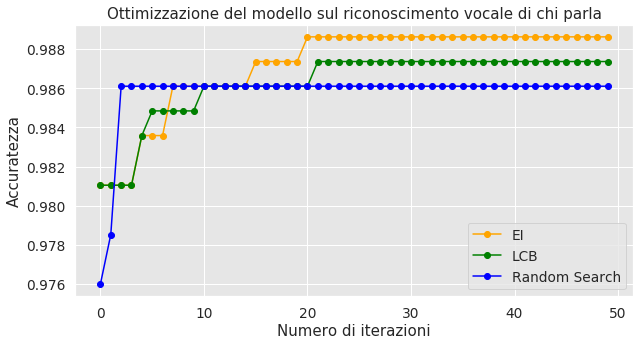

In [0]:
import matplotlib.pyplot as plt
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale=1.25)
plt.figure(figsize = (10,5))
plt.plot(lista_res_ei, marker = "o", color = "orange")
plt.plot(lista_res_lcb, marker = "o", color = "green")
#plt.plot(lista_res_gs, marker = "o", color = "red")
plt.plot(lista_res_rs, marker = "o", color = "blue")
plt.legend(["EI","LCB","Random Search"])
plt.xlabel("Numero di iterazioni")
plt.title("Ottimizzazione del modello sul riconoscimento vocale di chi parla" )
plt.ylabel("Accuratezza")
plt.savefig('/content/drive/My Drive/Dataset/ottimizzazione_chi3.png')

## Modello per la classe delle richieste

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat.iloc[:,0:187].values, feat.Cosa.values,
                                                    stratify=feat["Cosa"],test_size=0.3, random_state = 20)
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
sst = StandardScaler()
X_train = sst.fit_transform(X_train)
X_test = sst.transform(X_test)
from sklearn.externals.joblib import dump, load
dump(sst, '/content/drive/My Drive/Dataset/std_scaler_modello_cosa.bin', compress=True)

In [ ]:
import time 
start_time = time.time() 
clf_cosa = MLPClassifier() 
parametri = { "momentum": uniform(0.1, 0.6), 'learning_rate_init': uniform(0.0001, 0.1), 
             "hidden_layer_sizes": [random.randint(150,300)],"random_state":[random.randint(0,20000)]} #,"random_state":[random.randint(0,20000)]

skfold = StratifiedKFold(n_splits = 9)
clf_randomsearch = RandomizedSearchCV(clf_cosa, parametri,n_iter = 100, cv = skfold, scoring = "accuracy") 
clf_randomsearch.fit(X_train, y_train) 
end_time = time.time() 
print("Elapsed time was %g seconds" % (end_time - start_time)) 
print("Miglior configurazione: {}\nMiglior accuratezza: {}".format(clf_randomsearch.best_params_, clf_randomsearch.best_score_))

- Modello con parametri migliori dopo random search

In [ ]:
from sklearn.metrics import classification_report
clf = MLPClassifier()
#clf = LogisticRegression()
scores = cross_val_score(clf, X_train, y_train, cv=9)
clf.fit(X_train, y_train)
test_pred = clf.predict(X_test)
score2 = accuracy_score(y_test,test_pred)
print(" accuracy test: ", score2)
print('Accuracy CV & variance: ', scores.mean(), scores.std() * 2)
print(classification_report(test_pred, y_test))

Senza random search

In [ ]:
from sklearn.metrics import classification_report
clf = MLPClassifier(random_state=23, hidden_layer_sizes=(150,))
#clf = LogisticRegression()
scores = cross_val_score(clf, X_train, y_train, cv=9)
clf.fit(X_train, y_train)
test_pred = clf.predict(X_test)
score2 = accuracy_score(y_test,test_pred)
print(" accuracy test: ", score2)
print('Accuracy CV & variance: ', scores.mean(), scores.std() * 2)
print(classification_report(test_pred, y_test))

# AutoMl:

In [0]:
# Inizializzo configuration space
conf_space = ConfigurationSpace()

one_layer = UniformIntegerHyperparameter("h1", 150, 300)
#second_layer = UniformIntegerHyperparameter("h2", 0, 100)
momentum = UniformFloatHyperparameter("momentum", 0.1, 0.9)
learning_r = UniformFloatHyperparameter("learning_rate_init", 0.0001, 0.1)

conf_space.add_hyperparameters([one_layer, momentum,learning_r])
random_f_init = conf_space.sample_configuration(10)

In [0]:
def get_error_nn(param):
    adactive_seed = int(param['momentum']*param['learning_rate_init']*5000)
    mlp = MLPClassifier(hidden_layer_sizes = (param["h1"]),momentum = param["momentum"],
                        learning_rate_init=param["learning_rate_init"],
                        random_state = adactive_seed)
    strat = StratifiedKFold(n_splits = 9, random_state = 23)
    scores = cross_val_score(mlp, X_train, y_train, cv = strat, scoring = 'accuracy')
    return 1 - np.mean(scores)

In [ ]:
scen = Scenario({"run_obj": "quality","runcount-limit": 100,
                 "cs": conf_space,"deterministic": "true"
                     })

smac_rf_lcb = SMAC4HPO(scenario = scen,tae_runner = get_error_nn,initial_design = None,
               initial_design_kwargs = {'max_config_fracs': 10/100},
               initial_configurations = random_f_init,acquisition_function = LCB,
               )
incumbent3 = smac_rf_lcb.optimize()
inc_value_LCB = get_error_nn(incumbent3)

print("Optimized Value: %.4f" % (1-inc_value_LCB))

In [0]:
smac_rf_ei = SMAC4HPO(scenario = scen,tae_runner = get_error_nn,initial_design = None,
               initial_design_kwargs = {'max_config_fracs': 10/100},
               initial_configurations = random_f_init,acquisition_function = EI,
               )
incumbent4 = smac_rf_ei.optimize()
inc_value_ei = get_error_nn(incumbent4)

print("Optimized Value: %.4f" % (1-inc_value_ei))

In [0]:
result_lcb = 1-smac_rf_lcb.get_X_y()[1]
result_ei = 1-smac_rf_ei.get_X_y()[1]
result_random_search = clf_randomsearch.cv_results_['mean_test_score']
def change_max(x):
    global top_v
    if x >= top_v:
        top_v = x
        return x
    else:
        return top_v
top_v = 0
lista_res_lcb = [change_max(i) for i in result_lcb]
top_v = 0
lista_res_ei = [change_max(i) for i in result_ei]
top_v = 0
lista_res_rs = [change_max(i) for i in result_random_search]

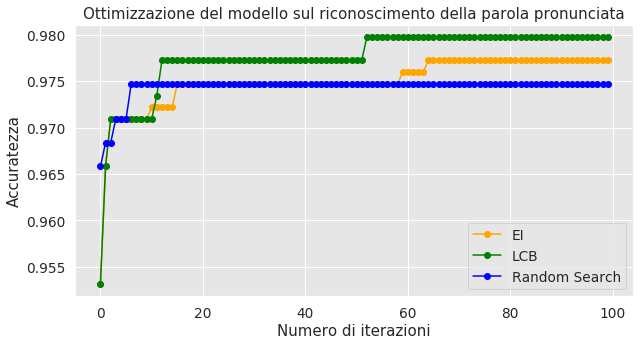

In [0]:
import matplotlib.pyplot as plt
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale=1.25)
plt.figure(figsize = (10,5))
plt.plot(lista_res_ei, marker = "o", color = "orange")
plt.plot(lista_res_lcb, marker = "o", color = "green")
#plt.plot(lista_res_gs, marker = "o", color = "red")
plt.plot(lista_res_rs, marker = "o", color = "blue")
plt.legend(["EI","LCB","Random Search"])
plt.xlabel("Numero di iterazioni")
plt.title("Ottimizzazione del modello sul riconoscimento della parola pronunciata" )
plt.ylabel("Accuratezza")
plt.savefig('/content/drive/My Drive/Dataset/ottimizzazione_chi4.png')

In [0]:
from sklearn.metrics import classification_report
clf = MLPClassifier(random_state = 3,
                    hidden_layer_sizes=(164), learning_rate_init=0.0009660602046093942,momentum = 0.6370467759611455, max_iter = 500)
#clf = LogisticRegression()
strat = StratifiedKFold(n_splits = 9, random_state = 23)
scores = cross_val_score(clf, X_train, y_train, cv=strat)
clf.fit(X_train, y_train)
test_pred = clf.predict(X_test)
score2 = accuracy_score(y_test,test_pred)
print(" accuracy test: ", score2)
print('Accuracy CV & variance: ', scores.mean(), scores.std() * 2)
print(classification_report(test_pred, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


 accuracy test:  0.9735294117647059
Accuracy CV & variance:  0.9759520492279113 0.022808514933147075
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       132
           1       1.00      0.98      0.99        91
           2       0.93      1.00      0.96       117

    accuracy                           0.97       340
   macro avg       0.98      0.97      0.97       340
weighted avg       0.98      0.97      0.97       340



In [0]:
from joblib import dump, load
dump(clf, '/content/drive/My Drive/Dataset/modello_cosa_finale.joblib') 

['/content/drive/My Drive/Dataset/modello_cosa_finale.joblib']

# Esportiamo i modelli

In [0]:
#esportiamo il modello
from joblib import dump, load
dump(clf, '/mnt/d/Data_Science_all/MSC_2_anno/PROGETTO_AML_DSIM/modello_cosa.joblib') 
#importiamo il modello
#clf = load('filename.joblib') 